In [220]:
import argparse
import mne
import numpy as np
import pandas as pd
import os
import sys

In [221]:
# EEG data 파일 경로
file_path = "gdf_dataset/l1b.gdf"
# GDF EEG data
raw = mne.io.read_raw_gdf(file_path, preload=True)

Extracting EDF parameters from F:\MindWaveWeb\gdf_dataset\l1b.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
#  1, #  2, #  3, #  4, #  5, #  6, #  7, #  8, #  9, # 10, # 11, # 12, # 13, # 14, # 15, # 16, # 17, # 18, # 19, # 20, # 21, # 22, # 23, # 24, # 25, # 26, # 27, # 28, # 29, # 30, # 31, # 32, # 33, # 34, # 35, # 36, # 37, # 38, # 39, # 40, # 41, # 42, # 43, # 44, # 45, # 46, # 47, # 48, # 49, # 50, # 51, # 52, # 53, # 54, # 55, # 56, # 57, # 58, # 59, # 60
Creating raw.info structure...
Reading 0 ... 633429  =      0.000 ...  2533.716 secs...


In [222]:
raw

<RawGDF | l1b.gdf, 60 x 633430 (2533.7 s), ~290.0 MiB, data loaded>

In [223]:
raw.ch_names

['#  1',
 '#  2',
 '#  3',
 '#  4',
 '#  5',
 '#  6',
 '#  7',
 '#  8',
 '#  9',
 '# 10',
 '# 11',
 '# 12',
 '# 13',
 '# 14',
 '# 15',
 '# 16',
 '# 17',
 '# 18',
 '# 19',
 '# 20',
 '# 21',
 '# 22',
 '# 23',
 '# 24',
 '# 25',
 '# 26',
 '# 27',
 '# 28',
 '# 29',
 '# 30',
 '# 31',
 '# 32',
 '# 33',
 '# 34',
 '# 35',
 '# 36',
 '# 37',
 '# 38',
 '# 39',
 '# 40',
 '# 41',
 '# 42',
 '# 43',
 '# 44',
 '# 45',
 '# 46',
 '# 47',
 '# 48',
 '# 49',
 '# 50',
 '# 51',
 '# 52',
 '# 53',
 '# 54',
 '# 55',
 '# 56',
 '# 57',
 '# 58',
 '# 59',
 '# 60']

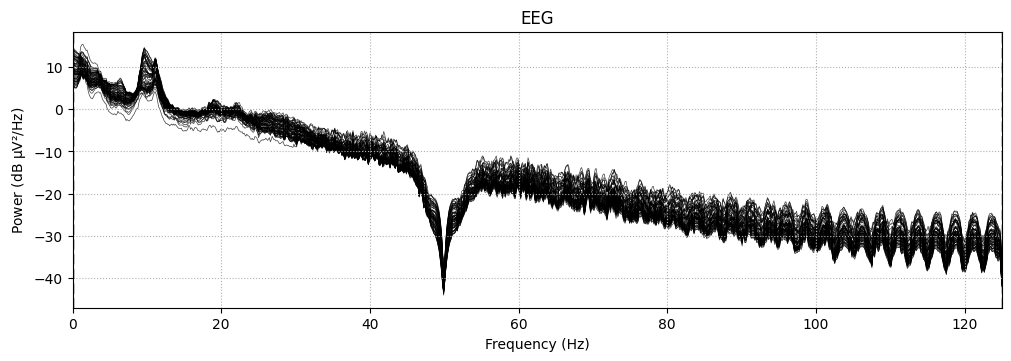

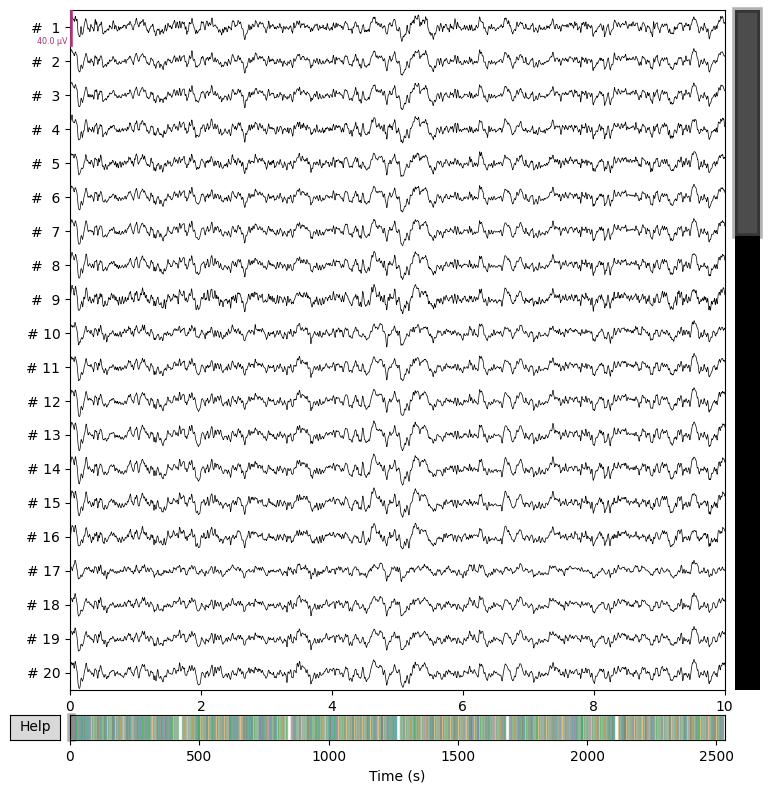

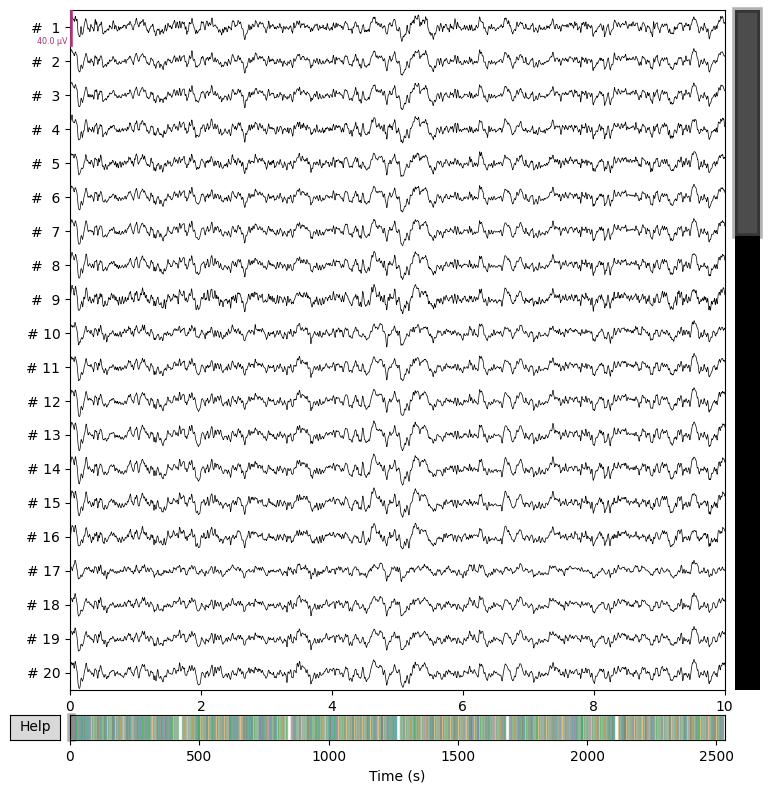

In [224]:
raw.plot()

In [225]:
# 데이터를 DataFrame으로 변환
raw_df = raw.to_data_frame()

raw_df.to_csv('l1b_eeg_data.csv', index=False)

In [226]:
raw_df.head(15)

,time,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,...,# 51,# 52,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60
0,0.000,7.756797,4.231847,6.245156,3.744097,5.122050,3.053669,3.575757,1.970708,0.651668,...,-1.401171,-2.132641,0.662897,1.432559,1.401885,0.913339,-1.813870,0.881953,1.841558,0.445080
1,0.004,9.249793,5.798911,8.259336,5.111928,5.821070,4.395660,4.905525,2.871704,0.437619,...,-2.829314,-3.686998,-0.314522,0.350991,-0.012904,-0.465742,-3.824667,-0.691089,-0.440112,-1.875884
2,0.008,10.805472,8.375131,11.032960,7.413984,7.351357,6.935729,6.887495,5.277934,2.803043,...,-3.390642,-4.299573,-1.111560,-0.532781,-1.145590,-1.431949,-4.758252,-2.077358,-2.118188,-3.327497
3,0.012,12.777139,11.193384,13.410353,9.124759,8.579366,9.382254,8.934685,7.902262,5.988384,...,-3.249355,-4.028706,-1.333891,-1.033585,-1.923510,-1.985284,-4.944124,-2.895007,-2.888733,-3.962325
4,0.016,14.845680,12.863004,14.223454,10.086577,9.063012,10.871756,10.467360,9.911626,8.763766,...,-2.626930,-3.253611,-1.296137,-1.345010,-2.462070,-2.402413,-4.297796,-3.085931,-3.244040,-3.865281
5,0.020,15.369938,13.096833,13.975809,11.399222,9.916950,11.853964,11.550741,11.520546,11.350495,...,-0.931488,-1.307539,-0.582998,-0.852622,-2.008995,-1.755437,-2.320793,-2.168669,-2.499180,-2.268102
6,0.024,14.036498,12.625073,13.558940,13.547545,10.540400,12.397236,12.358747,12.975726,13.599824,...,1.329101,1.205269,0.155310,0.077442,-0.876310,0.096106,0.125114,-0.844657,-0.855350,0.097340
7,0.028,12.834124,12.497903,14.120269,15.975741,10.442159,12.667074,13.043559,14.355822,15.410171,...,3.776800,3.909767,0.738406,1.226346,0.850502,2.556317,3.014579,0.790642,1.541901,2.749870
8,0.032,11.198666,11.480542,14.083122,16.338394,9.712912,11.958301,12.492810,14.573920,15.863665,...,6.075574,6.401740,1.212433,2.514128,2.914983,5.008016,5.735070,2.446694,3.994803,5.252790
9,0.036,10.457866,10.520613,13.344314,14.422642,9.168809,11.177572,11.434794,13.751583,14.934910,...,8.500361,8.877043,2.470913,4.496302,5.492377,7.523561,8.083816,4.405733,6.481951,7.432232


'FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4' 채널 매핑

In [227]:
# 채널 매핑 정의
channel_mapping = {
    10: 'FC3',
    13: 'FCz',
    16: 'FC4',
    28: 'C3',
    31: 'Cz',
    34: 'C4',
    46: 'CP3',
    49: 'CPz',
    52: 'CP4'
}
print(channel_mapping)

{10: 'FC3', 13: 'FCz', 16: 'FC4', 28: 'C3', 31: 'Cz', 34: 'C4', 46: 'CP3', 49: 'CPz', 52: 'CP4'}


In [228]:
# 채널 이름을 매핑된 채널 번호로 변환
def map_channel_names(raw, channel_mapping):
    # 기존 채널 번호를 가져옴
    original_channel_names = raw.info['ch_names']
    
    # 새로운 채널 이름 목록을 초기화
    new_channel_names = []
    
    for ch in range(len(original_channel_names)):
        if ch + 1 in channel_mapping:
            new_channel_names.append(channel_mapping[ch + 1])
        else:
            new_channel_names.append(original_channel_names[ch])
    
    # 채널 이름을 새로 설정
    raw.rename_channels(dict(zip(original_channel_names, new_channel_names)))

# 채널 이름 매핑 적용
map_channel_names(raw, channel_mapping)

In [229]:
raw.ch_names


['#  1',
 '#  2',
 '#  3',
 '#  4',
 '#  5',
 '#  6',
 '#  7',
 '#  8',
 '#  9',
 'FC3',
 '# 11',
 '# 12',
 'FCz',
 '# 14',
 '# 15',
 'FC4',
 '# 17',
 '# 18',
 '# 19',
 '# 20',
 '# 21',
 '# 22',
 '# 23',
 '# 24',
 '# 25',
 '# 26',
 '# 27',
 'C3',
 '# 29',
 '# 30',
 'Cz',
 '# 32',
 '# 33',
 'C4',
 '# 35',
 '# 36',
 '# 37',
 '# 38',
 '# 39',
 '# 40',
 '# 41',
 '# 42',
 '# 43',
 '# 44',
 '# 45',
 'CP3',
 '# 47',
 '# 48',
 'CPz',
 '# 50',
 '# 51',
 'CP4',
 '# 53',
 '# 54',
 '# 55',
 '# 56',
 '# 57',
 '# 58',
 '# 59',
 '# 60']

Based on the code context, the error is occurring because the `raw` object has been converted to a pandas DataFrame earlier in the notebook. You need to use the MNE Raw object to plot the PSD.

Here's the corrected code cell:



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\User\AppData\Local\Temp\ipykernel_15896\2093185488.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


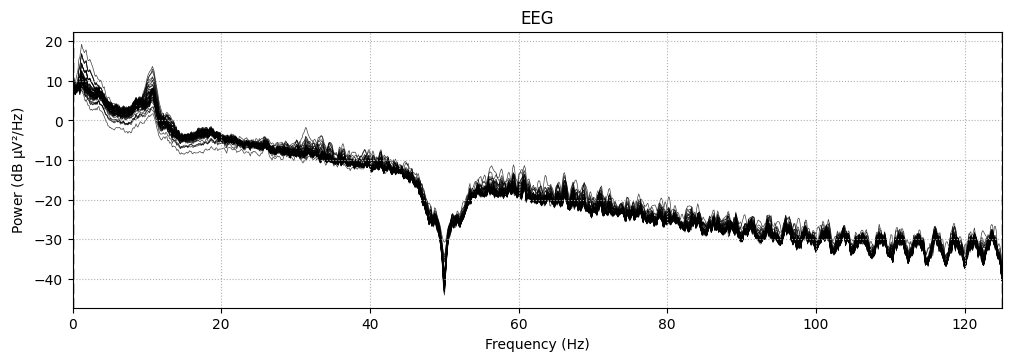

In [230]:
raw.plot_psd()

In [231]:
# 데이터를 DataFrame으로 변환
raw = raw.to_data_frame()
raw

,time,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,...,# 51,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60
0,0.000,7.756797,4.231847,6.245156,3.744097,5.122050,3.053669,3.575757,1.970708,0.651668,...,-1.401171,-2.132641,0.662897,1.432559,1.401885,0.913339,-1.813870,0.881953,1.841558,0.445080
1,0.004,9.249793,5.798911,8.259336,5.111928,5.821070,4.395660,4.905525,2.871704,0.437619,...,-2.829314,-3.686998,-0.314522,0.350991,-0.012904,-0.465742,-3.824667,-0.691089,-0.440112,-1.875884
2,0.008,10.805472,8.375131,11.032960,7.413984,7.351357,6.935729,6.887495,5.277934,2.803043,...,-3.390642,-4.299573,-1.111560,-0.532781,-1.145590,-1.431949,-4.758252,-2.077358,-2.118188,-3.327497
3,0.012,12.777139,11.193384,13.410353,9.124759,8.579366,9.382254,8.934685,7.902262,5.988384,...,-3.249355,-4.028706,-1.333891,-1.033585,-1.923510,-1.985284,-4.944124,-2.895007,-2.888733,-3.962325
4,0.016,14.845680,12.863004,14.223454,10.086577,9.063012,10.871756,10.467360,9.911626,8.763766,...,-2.626930,-3.253611,-1.296137,-1.345010,-2.462070,-2.402413,-4.297796,-3.085931,-3.244040,-3.865281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,2533.700,42.722540,40.692740,45.517532,43.474276,35.724013,39.557265,40.570114,42.054286,42.253378,...,42.504660,44.031355,41.479594,41.985067,43.144566,43.034883,46.280520,43.445393,42.308018,43.156471
633426,2533.704,58.837781,57.971462,63.546091,63.175778,52.810329,58.132868,59.197732,61.425691,61.731845,...,59.692010,61.558505,57.965681,59.071325,60.660592,60.154209,63.148408,60.101374,59.345626,59.997610
633427,2533.708,55.618152,54.541972,60.173991,60.124765,50.180503,55.736713,56.733857,58.543935,57.461747,...,56.652434,58.745660,56.119910,57.329032,58.707243,57.723793,58.793088,57.922359,57.402140,57.587689
633428,2533.712,36.363060,34.030669,38.880645,37.999009,31.034911,35.495314,35.740194,36.601832,34.674589,...,35.791627,37.701412,37.506993,38.247974,38.840360,37.416407,37.155893,38.373475,37.821733,37.766498


0-1 Scaling (MinMaxScaler)

In [232]:
from sklearn.preprocessing import MinMaxScaler


# time 컬럼을 제외한 나머지 데이터만 스케일링
features = raw.drop(columns=['time'])

# Min-Max 스케일러 초기화
scaler = MinMaxScaler()

# 스케일링 적용
scaled_features = scaler.fit_transform(features)

# 스케일링된 데이터를 DataFrame으로 변환하고 time 컬럼 추가
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['time'] = raw['time']

# 결과 확인
scaled_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,0.525750,...,0.540475,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,0.530205,...,0.534783,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,0.534813,...,0.532540,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,0.537377,...,0.533532,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,0.536736,...,0.536370,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,0.637812,...,0.709514,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,0.701411,...,0.773693,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,0.693233,...,0.763394,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,0.625299,...,0.686336,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


Large Laplacian Filter 적용

In [233]:
import mne
import numpy as np

# 10-20 시스템의 표준 전극 위치 파일 로드
montage = mne.channels.make_standard_montage('standard_1020')

# 60채널에 대한 모든 전극 위치 정보
all_positions = montage.get_positions()['ch_pos']

# 적용할 채널들
target_channels = ['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4']

# 각 채널의 위치 추출
channel_positions = {ch: all_positions[ch] for ch in target_channels}
channel_positions

{'FC3': array([-0.0601819,  0.0227162,  0.055544 ]),
 'FCz': array([0.0003761, 0.02739  , 0.088668 ]),
 'FC4': array([0.0622931, 0.0237228, 0.05563  ]),
 'C3': array([-0.0653581, -0.0116317,  0.064358 ]),
 'Cz': array([ 0.0004009, -0.009167 ,  0.100244 ]),
 'C4': array([ 0.0671179, -0.0109003,  0.06358  ]),
 'CP3': array([-0.0635562, -0.0470088,  0.065624 ]),
 'CPz': array([ 0.0003858, -0.047318 ,  0.099432 ]),
 'CP4': array([ 0.0666118, -0.0466372,  0.06558  ])}

In [234]:


def calculate_distance(pos1, pos2):
    return np.linalg.norm(np.array(pos1) - np.array(pos2))

def apply_large_laplacian_filter(scaled_df, target_channels, neighbor_dict, electrode_positions):
    filtered_df = scaled_df.copy()  # 함수 내부에서 결과를 저장할 데이터프레임

    for ch in target_channels:
        # 인접 채널 설정
        neighbors = neighbor_dict.get(ch, [])
        
        # 존재하는 인접 채널만 선택
        neighbors = [n for n in neighbors if n in scaled_df.columns and n in electrode_positions]
        
        if not neighbors:
            continue
        
        # 현재 채널과 인접 채널 데이터 추출
        ch_data = scaled_df[ch].values
        neighbor_data = scaled_df[neighbors].values
        
        # 거리 계산 및 가중치 설정
        distances = np.array([calculate_distance(electrode_positions[ch], electrode_positions[n]) for n in neighbors])
        weights = 1 / distances
        weights /= weights.sum()  # 정규화
        
        # 가중치를 사용하여 인접 채널 데이터의 가중합 계산
        weighted_avg_neighbor_data = np.sum(weights[:, np.newaxis] * neighbor_data.T, axis=0)
        
        # 라플라시안 필터 적용
        filtered_df[ch] = ch_data - weighted_avg_neighbor_data

    return filtered_df

# 10-20 시스템의 표준 전극 위치 파일 로드
montage = mne.channels.make_standard_montage('standard_1020')

# 적용할 채널 목록
target_channels = ['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4']

# 60채널에 대한 모든 전극 위치 정보
all_positions = montage.get_positions()['ch_pos']

# 각 채널의 위치 추출 (존재하는 채널만)
electrode_positions = {ch: all_positions[ch] for ch in target_channels if ch in all_positions}

# 각 채널의 인접 채널을 정의
neighbor_dict = {
    'FC3': ['FCz', 'C3'],
    'FCz': ['FC3', 'FC4', 'Cz'],
    'FC4': ['FCz', 'C4'],
    'C3': ['FC3', 'Cz', 'CP3'],
    'Cz': ['C3', 'C4', 'FCz', 'CPz'],
    'C4': ['FC4', 'Cz', 'CP4'],
    'CP3': ['C3', 'CPz'],
    'CPz': ['CP3', 'CP4', 'Cz'],
    'CP4': ['C4', 'CPz']
}

# 라플라시안 필터 적용
# scaled_df는 함수 호출 전에 준비된 데이터프레임이어야 합니다.
filtered_df = apply_large_laplacian_filter(scaled_df, target_channels, neighbor_dict, electrode_positions)

filtered_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.010435,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.007566,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.004562,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.002663,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.001851,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.006772,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.001367,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.002139,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.006689,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


In [235]:
# CSV 파일로 저장
csv_file_path = "l1b_eeg_data.csv"
filtered_df.to_csv(csv_file_path, index=False)

print("CSV File path:", csv_file_path)

CSV File path: l1b_eeg_data.csv


In [236]:
filtered_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.010435,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.007566,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.004562,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.002663,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.001851,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.006772,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.001367,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.002139,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.006689,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


HDR.TRIG / HDR.Classlabel 로드

In [237]:
# CSV 파일 읽기
eeg_d = pd.read_csv('l1b_eeg_data.csv')
trig_df = pd.read_csv('csv_trig/l1b_HDR_TRIG.csv', header=None)
label_df = pd.read_csv('csv_Classlabels/l1b_HDR_Classlabel.csv', header=None)



In [238]:
eeg_d

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.010435,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.007566,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.004562,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.002663,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.001851,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.006772,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.001367,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.002139,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.006689,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712


In [239]:
# 각 trial의 시작
trig_df

,0
0,2607
1,5167
2,7727
3,10287
4,12847
...,...
235,619798
236,622358
237,624918
238,627478


In [240]:
# trigger dataframe에 index 컬럼 이름 지정
trig_df.columns = ['index']

In [241]:
trig_df

,index
0,2607
1,5167
2,7727
3,10287
4,12847
...,...
235,619798
236,622358
237,624918
238,627478


In [242]:
# label의 값
label_df

,0
0,2.0
1,1.0
2,NaN
3,NaN
4,3.0
...,...
235,NaN
236,3.0
237,1.0
238,NaN


In [243]:
# label dataframe에 label 컬럼 이름 지정
label_df.columns = ['label']

In [244]:
label_df

,label
0,2.0
1,1.0
2,NaN
3,NaN
4,3.0
...,...
235,NaN
236,3.0
237,1.0
238,NaN


In [245]:
# eeg_d에 label column 추가
eeg_d['label'] = 0
eeg_d

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000,0
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004,0
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008,0
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012,0
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700,0
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704,0
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708,0
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712,0


trig_df, label_df를 통해 eeg_d에 label 값 정하기

In [246]:
# trigger 인덱스와 레이블 가져오기
trigger_indices = trig_df['index'].values
labels = label_df['label'].values

In [247]:
# 트리거 구간에 따라 레이블 지정
for i in range(len(trigger_indices) - 1):
    start_idx = trigger_indices[i]
    end_idx = trigger_indices[i + 1]
    label = labels[i]
    eeg_d.loc[start_idx:end_idx-1, 'label'] = label

In [248]:
# 마지막 트리거 이후 구간 레이블 지정
if len(trigger_indices) > 0:
    start_idx = trigger_indices[-1]
    label = labels[-1]
    eeg_d.loc[start_idx:, 'label'] = label

In [249]:
eeg_d[2500:3100]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
2500,0.478309,0.488808,0.493240,0.497185,0.542672,0.551492,0.544228,0.547021,0.546075,-0.053815,...,0.576394,0.586282,0.594415,0.594553,0.596307,0.576440,0.586627,0.584833,10.000,0.0
2501,0.477089,0.486610,0.492553,0.497047,0.538918,0.546975,0.540414,0.545098,0.544366,-0.053782,...,0.572351,0.582544,0.592981,0.593240,0.596277,0.574395,0.584170,0.584955,10.004,0.0
2502,0.474449,0.483650,0.492157,0.500511,0.534020,0.543771,0.538643,0.545953,0.548333,-0.054592,...,0.571115,0.580941,0.592065,0.593729,0.595727,0.573571,0.583834,0.586358,10.008,0.0
2503,0.472313,0.480507,0.491211,0.503349,0.526772,0.541146,0.537285,0.546258,0.552621,-0.056596,...,0.571176,0.579644,0.589670,0.593240,0.592554,0.572274,0.583071,0.585794,10.012,0.0
2504,0.471244,0.478233,0.488662,0.503670,0.520958,0.538537,0.536919,0.546349,0.553063,-0.059430,...,0.573251,0.579263,0.587533,0.591913,0.590753,0.572488,0.583254,0.584619,10.016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,0.438437,0.449348,0.454146,0.462623,0.512657,0.518425,0.511604,0.511299,0.510170,-0.045894,...,0.555123,0.556420,0.554482,0.561379,0.563668,0.543297,0.549944,0.546349,12.380,2.0
3096,0.423529,0.437888,0.441725,0.451560,0.505013,0.509865,0.502037,0.504768,0.507744,-0.048503,...,0.557443,0.557305,0.554192,0.559014,0.560586,0.544732,0.549135,0.544106,12.384,2.0
3097,0.414008,0.432486,0.437071,0.449210,0.501488,0.507973,0.500114,0.505882,0.509285,-0.052031,...,0.560052,0.559304,0.555627,0.558816,0.559884,0.548363,0.551424,0.545403,12.388,2.0
3098,0.410803,0.433478,0.439192,0.450889,0.501305,0.513329,0.505791,0.512398,0.512444,-0.054858,...,0.565957,0.565103,0.561639,0.563638,0.563348,0.555901,0.559343,0.552911,12.392,2.0


In [250]:
eeg_d[4945:5045]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
4945,0.465293,0.477119,0.484863,0.490654,0.528206,0.533745,0.528695,0.520760,0.521340,-0.028429,...,0.541253,0.547829,0.549294,0.548058,0.540230,0.534752,0.546785,0.537148,19.780,2.0
4946,0.469184,0.482246,0.488144,0.493339,0.536980,0.540200,0.533379,0.525185,0.523064,-0.030010,...,0.547417,0.554009,0.554086,0.554177,0.546029,0.539803,0.551164,0.541115,19.784,2.0
4947,0.469612,0.481636,0.486770,0.491279,0.540352,0.542519,0.534630,0.526833,0.523308,-0.032581,...,0.553735,0.559960,0.558419,0.559594,0.548775,0.544671,0.555376,0.544198,19.788,2.0
4948,0.470634,0.481910,0.488189,0.494026,0.543511,0.546304,0.538796,0.532143,0.527901,-0.034989,...,0.562661,0.567376,0.564492,0.564950,0.551461,0.551507,0.560335,0.548028,19.792,2.0
4949,0.472374,0.484627,0.492462,0.499840,0.547265,0.552300,0.544579,0.538949,0.534737,-0.035412,...,0.570275,0.573205,0.568795,0.568490,0.553841,0.557366,0.562578,0.550164,19.796,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,0.537713,0.516335,0.523148,0.539132,0.536065,0.541695,0.534127,0.543236,0.546899,-0.057713,...,0.575891,0.576898,0.574258,0.570336,0.569589,0.571191,0.577898,0.567163,20.160,2.0
5041,0.532952,0.514153,0.522355,0.536873,0.537407,0.543923,0.537102,0.544991,0.546441,-0.060166,...,0.580819,0.581521,0.579599,0.576104,0.574350,0.576974,0.583316,0.572229,20.164,2.0
5042,0.525002,0.508659,0.519135,0.530114,0.538170,0.543816,0.536919,0.542016,0.543191,-0.055691,...,0.579721,0.581323,0.581277,0.580026,0.577768,0.577447,0.585253,0.574624,20.168,2.0
5043,0.515648,0.501549,0.513276,0.520500,0.533974,0.540200,0.532143,0.536019,0.538857,-0.050751,...,0.575692,0.578790,0.580804,0.582727,0.579004,0.576089,0.585665,0.575189,20.172,2.0


In [251]:
# 각 레이블의 개수 출력
print(eeg_d['label'].value_counts())

label
1.0    82841
2.0    80828
3.0    76802
4.0    76800
0.0     2607
Name: count, dtype: int64


In [252]:
eeg_d

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000,0.0
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004,0.0
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008,0.0
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012,0.0
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,0.578851,0.620142,0.643651,0.656306,0.663386,0.693904,0.689021,0.701030,0.702174,-0.046341,...,0.696803,0.701335,0.702754,0.704311,0.714626,0.699977,0.702216,0.707485,2533.700,2.0
633426,0.622004,0.684413,0.710303,0.732570,0.732387,0.772686,0.767468,0.783703,0.784100,-0.047074,...,0.756771,0.763287,0.765286,0.765682,0.775555,0.761212,0.762947,0.771038,2533.704,2.0
633427,0.613382,0.671656,0.697836,0.720760,0.721767,0.762524,0.757092,0.771405,0.766140,-0.045809,...,0.750057,0.756970,0.758312,0.756970,0.759823,0.753201,0.756020,0.761944,2533.708,2.0
633428,0.561822,0.595361,0.619114,0.635111,0.644450,0.676677,0.668681,0.677760,0.670298,-0.040603,...,0.682353,0.687785,0.687388,0.684169,0.681666,0.681331,0.686224,0.687144,2533.712,2.0


epoch로 자르기 (rest : 1~2s / label : 3~7s 값들만)

In [253]:
# label이 0인 eeg_d 행 출력
eeg_d[eeg_d['label'] == 0]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.485222,0.484520,0.498459,0.502510,0.539803,0.539086,0.533227,0.529961,0.527199,-0.039406,...,0.548333,0.554299,0.553735,0.553307,0.540902,0.543496,0.557970,0.546304,0.000,0.0
1,0.489220,0.490349,0.505905,0.507805,0.542626,0.544778,0.538827,0.533806,0.526299,-0.037271,...,0.544778,0.550378,0.548684,0.548363,0.533639,0.537713,0.549837,0.537545,0.004,0.0
2,0.493385,0.499931,0.516160,0.516716,0.548806,0.555550,0.547173,0.544076,0.536248,-0.035571,...,0.541878,0.547173,0.544640,0.544900,0.530266,0.532616,0.543855,0.532067,0.008,0.0
3,0.498665,0.510414,0.524949,0.523339,0.553765,0.565927,0.555795,0.555276,0.549645,-0.035245,...,0.541070,0.545357,0.541863,0.542916,0.529595,0.529610,0.541108,0.529671,0.012,0.0
4,0.504204,0.516625,0.527955,0.527062,0.555718,0.572244,0.562249,0.563851,0.561318,-0.037259,...,0.541207,0.544228,0.539940,0.541421,0.531930,0.528908,0.539842,0.530037,0.016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,0.458457,0.453056,0.466247,0.475898,0.504692,0.508766,0.506126,0.505730,0.511452,-0.030127,...,0.534630,0.537530,0.534661,0.536110,0.532036,0.523262,0.531755,0.525032,10.408,0.0
2603,0.455024,0.450980,0.465148,0.477913,0.502968,0.507759,0.506416,0.505653,0.502968,-0.029518,...,0.538460,0.541482,0.538705,0.539345,0.534997,0.529168,0.536531,0.529046,10.412,0.0
2604,0.452720,0.450980,0.462920,0.475761,0.500893,0.507576,0.504051,0.504143,0.494408,-0.030238,...,0.542870,0.546395,0.543465,0.543526,0.538048,0.537484,0.543428,0.534844,10.416,0.0
2605,0.452674,0.454353,0.461562,0.471580,0.501244,0.508659,0.502922,0.502129,0.492485,-0.030275,...,0.547066,0.551934,0.549248,0.548928,0.541360,0.546258,0.552400,0.542473,10.420,0.0


In [254]:
# 샘플링 주파수
fs = 250
start_offset = 3 * fs
end_offset = 7 * fs

# Epochs를 저장할 리스트 초기화
epochs = []

trigger_indices = trig_df['index'].values.astype(int)  # 정수로 변환
labels = label_df['label'].values

# Epoch 추출
for idx, label in zip(trigger_indices, labels):
    start_idx = int(idx + start_offset)  # 정수로 변환
    end_idx = int(idx + end_offset)  # 정수로 변환
    
    if end_idx <= len(eeg_d):
        epoch = eeg_d.iloc[start_idx:end_idx].copy()
        epoch['label'] = label
        epochs.append(epoch)

# epochs 리스트를 단일 DataFrame으로 결합
epochs_df = pd.concat(epochs, ignore_index=True)

In [255]:
epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.462196,0.470375,0.474883,0.484550,0.518883,0.524498,0.515465,0.515496,0.522103,-0.036971,...,0.543679,0.548196,0.549294,0.550134,0.545480,0.541238,0.554201,0.543008,13.428,2.0
1,0.462303,0.468513,0.473006,0.479255,0.515572,0.521019,0.511650,0.509789,0.511116,-0.037792,...,0.542077,0.545785,0.546609,0.545846,0.542840,0.536706,0.549760,0.538262,13.432,2.0
2,0.462623,0.467994,0.472274,0.477623,0.516991,0.521004,0.512200,0.507820,0.507744,-0.036698,...,0.542763,0.547234,0.548913,0.548165,0.546395,0.534905,0.549501,0.539712,13.436,2.0
3,0.462684,0.469108,0.474395,0.481804,0.522026,0.524651,0.517876,0.512917,0.516121,-0.034002,...,0.547539,0.553216,0.556893,0.557626,0.555962,0.539666,0.555101,0.548165,13.440,2.0
4,0.463783,0.472053,0.478271,0.489631,0.528038,0.529107,0.525948,0.520943,0.527428,-0.033876,...,0.552422,0.559701,0.564309,0.566903,0.565530,0.545953,0.561800,0.557305,13.444,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,0.460624,0.459266,0.469359,0.480797,0.512505,0.517571,0.505211,0.511254,0.509438,-0.044457,...,0.543389,0.547677,0.547997,0.548913,0.549584,0.536950,0.551195,0.548135,2527.132,2.0
239996,0.460182,0.458976,0.467360,0.478050,0.510109,0.515785,0.503532,0.512215,0.512749,-0.043229,...,0.543877,0.547921,0.547723,0.546700,0.546227,0.537301,0.550203,0.545357,2527.136,2.0
239997,0.459876,0.459251,0.466506,0.476829,0.507195,0.513329,0.501457,0.512474,0.515175,-0.042493,...,0.545144,0.548806,0.548531,0.546700,0.544717,0.539666,0.551225,0.544991,2527.140,2.0
239998,0.460166,0.461357,0.469024,0.479164,0.508705,0.513878,0.503868,0.514122,0.514687,-0.042347,...,0.550225,0.553079,0.552728,0.552331,0.548135,0.546105,0.556536,0.549828,2527.144,2.0


In [256]:
epochs[0]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
3357,0.462196,0.470375,0.474883,0.484550,0.518883,0.524498,0.515465,0.515496,0.522103,-0.036971,...,0.543679,0.548196,0.549294,0.550134,0.545480,0.541238,0.554201,0.543008,13.428,2.0
3358,0.462303,0.468513,0.473006,0.479255,0.515572,0.521019,0.511650,0.509789,0.511116,-0.037792,...,0.542077,0.545785,0.546609,0.545846,0.542840,0.536706,0.549760,0.538262,13.432,2.0
3359,0.462623,0.467994,0.472274,0.477623,0.516991,0.521004,0.512200,0.507820,0.507744,-0.036698,...,0.542763,0.547234,0.548913,0.548165,0.546395,0.534905,0.549501,0.539712,13.436,2.0
3360,0.462684,0.469108,0.474395,0.481804,0.522026,0.524651,0.517876,0.512917,0.516121,-0.034002,...,0.547539,0.553216,0.556893,0.557626,0.555962,0.539666,0.555101,0.548165,13.440,2.0
3361,0.463783,0.472053,0.478271,0.489631,0.528038,0.529107,0.525948,0.520943,0.527428,-0.033876,...,0.552422,0.559701,0.564309,0.566903,0.565530,0.545953,0.561800,0.557305,13.444,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0.471733,0.471962,0.484451,0.494835,0.516136,0.529732,0.525048,0.530220,0.542107,-0.031598,...,0.519493,0.526879,0.533425,0.534722,0.532631,0.523888,0.536531,0.530846,17.408,2.0
4353,0.468269,0.468330,0.483108,0.493858,0.511543,0.524758,0.520012,0.529778,0.539773,-0.032464,...,0.514672,0.523186,0.529870,0.531670,0.530617,0.519799,0.534150,0.529320,17.412,2.0
4354,0.465324,0.463172,0.479049,0.491051,0.509392,0.519722,0.515160,0.526497,0.532753,-0.034644,...,0.515694,0.524468,0.530709,0.532250,0.532235,0.519356,0.534669,0.531121,17.416,2.0
4355,0.462837,0.457069,0.473693,0.485664,0.506447,0.514076,0.509606,0.519402,0.524010,-0.035240,...,0.516777,0.524636,0.529717,0.531029,0.532570,0.518059,0.532685,0.530053,17.420,2.0


In [257]:
epochs[37]

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
98080,0.472663,0.488380,0.493652,0.504097,0.542992,0.549813,0.542947,0.540398,0.544030,-0.024339,...,0.549371,0.554879,0.554742,0.562234,0.555047,0.543664,0.557100,0.548257,392.320,1.0
98081,0.479469,0.497734,0.503525,0.518517,0.553964,0.561929,0.557031,0.553689,0.554635,-0.023675,...,0.550805,0.556451,0.555535,0.560601,0.551553,0.543725,0.556688,0.546365,392.324,1.0
98082,0.482414,0.502785,0.508835,0.523522,0.560098,0.568719,0.564477,0.559518,0.559075,-0.027283,...,0.556085,0.560586,0.557977,0.561471,0.549538,0.547677,0.558885,0.546761,392.328,1.0
98083,0.480888,0.499962,0.506165,0.518212,0.556497,0.565896,0.561608,0.555749,0.552773,-0.032296,...,0.560784,0.564096,0.559442,0.561761,0.548638,0.552468,0.561541,0.547906,392.332,1.0
98084,0.477089,0.492287,0.498367,0.509819,0.547616,0.558297,0.552758,0.546059,0.538552,-0.035224,...,0.563607,0.566491,0.560815,0.562280,0.550729,0.556497,0.565386,0.551553,392.336,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99075,0.470085,0.483024,0.487640,0.504601,0.532586,0.538659,0.535225,0.535760,0.537896,-0.034484,...,0.541390,0.544579,0.546349,0.544793,0.540597,0.533425,0.548723,0.540887,396.300,1.0
99076,0.472709,0.483314,0.487411,0.502464,0.532036,0.538643,0.534691,0.533211,0.537530,-0.035548,...,0.544717,0.546746,0.547738,0.545708,0.541024,0.536278,0.549501,0.541024,396.304,1.0
99077,0.475807,0.483207,0.487823,0.503151,0.530434,0.539696,0.534310,0.530999,0.536019,-0.034474,...,0.546044,0.546639,0.545953,0.544167,0.540002,0.536492,0.548021,0.538994,396.308,1.0
99078,0.477028,0.483223,0.489090,0.502831,0.529992,0.541100,0.533425,0.530770,0.536141,-0.031582,...,0.545357,0.544045,0.541833,0.540642,0.537926,0.534508,0.545091,0.535424,396.312,1.0


In [258]:
len(epochs)

240

rest 상태 epoch 추출

In [259]:
# 샘플링 주파수
fs = 250
start_offset = 1 * fs
end_offset = 2 * fs

# Epochs를 저장할 리스트 초기화
rest_epochs = []

trigger_indices = trig_df['index'].values.astype(int)  # 정수로 변환
labels = label_df['label'].values

# Epoch 추출
for idx, label in zip(trigger_indices, labels):
    start_idx = int(idx + start_offset)  # 정수로 변환
    end_idx = int(idx + end_offset)  # 정수로 변환
    
    if end_idx <= len(eeg_d):
        epoch = eeg_d.iloc[start_idx:end_idx].copy()
        epoch['label'] = label
        rest_epochs.append(epoch)

# rest_epochs 리스트를 단일 DataFrame으로 결합
rest_epochs_df = pd.concat(rest_epochs, ignore_index=True)

In [260]:
rest_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.467552,0.475593,0.484405,0.493904,0.524132,0.531106,0.526848,0.529702,0.522698,-0.039826,...,0.546487,0.551995,0.551553,0.558907,0.556924,0.538384,0.555162,0.552499,11.428,2.0
1,0.471229,0.482109,0.490738,0.501335,0.529030,0.536858,0.532326,0.538628,0.535729,-0.040041,...,0.549508,0.556619,0.557290,0.563699,0.560967,0.542870,0.560671,0.557061,11.432,2.0
2,0.474098,0.485359,0.493057,0.503395,0.529641,0.540017,0.533455,0.542748,0.544900,-0.040380,...,0.552483,0.560006,0.561288,0.565942,0.560922,0.547127,0.563219,0.557473,11.436,2.0
3,0.474128,0.484764,0.491379,0.504097,0.525383,0.539178,0.531456,0.542702,0.545861,-0.039419,...,0.554040,0.561196,0.561685,0.564904,0.557870,0.549035,0.562609,0.554864,11.440,2.0
4,0.469306,0.476936,0.484695,0.498756,0.520272,0.532143,0.523018,0.536019,0.536950,-0.038305,...,0.554726,0.561074,0.560342,0.563195,0.555825,0.549416,0.561174,0.553017,11.444,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.446021,0.441581,0.443617,0.456245,0.490578,0.490471,0.480949,0.483314,0.490654,-0.030880,...,0.524483,0.529732,0.529763,0.533150,0.530999,0.521798,0.536866,0.531945,2522.132,2.0
59996,0.455116,0.452445,0.456099,0.468345,0.501610,0.502968,0.495537,0.494331,0.502159,-0.031796,...,0.532525,0.536355,0.535103,0.535805,0.532631,0.529900,0.543413,0.535058,2522.136,2.0
59997,0.457877,0.456138,0.461272,0.473014,0.504814,0.506493,0.500816,0.496941,0.504295,-0.030827,...,0.529839,0.533028,0.530282,0.529473,0.525750,0.527672,0.539872,0.530098,2522.140,2.0
59998,0.453971,0.453956,0.458602,0.471489,0.502495,0.503334,0.498329,0.493812,0.501610,-0.029627,...,0.524269,0.527657,0.523919,0.522393,0.518471,0.522637,0.535096,0.524605,2522.144,2.0


NaN 값을 가진 epoch 제거

In [261]:
# NaN 값을 가진 행을 제거
label_epochs_df = epochs_df.dropna(subset=['label'])
rest_epochs_df = rest_epochs_df.dropna(subset=['label'])

In [262]:
# NaN 값을 가진 항목을 제거하여 rest_epochs 리스트를 업데이트
rest_epochs = [epoch for epoch in rest_epochs if not epoch['label'].isnull().any()]

# NaN 값을 가진 항목을 제거하여 epochs 리스트를 업데이트
epochs = [epoch for epoch in epochs if not epoch['label'].isnull().any()]

In [263]:
label_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.462196,0.470375,0.474883,0.484550,0.518883,0.524498,0.515465,0.515496,0.522103,-0.036971,...,0.543679,0.548196,0.549294,0.550134,0.545480,0.541238,0.554201,0.543008,13.428,2.0
1,0.462303,0.468513,0.473006,0.479255,0.515572,0.521019,0.511650,0.509789,0.511116,-0.037792,...,0.542077,0.545785,0.546609,0.545846,0.542840,0.536706,0.549760,0.538262,13.432,2.0
2,0.462623,0.467994,0.472274,0.477623,0.516991,0.521004,0.512200,0.507820,0.507744,-0.036698,...,0.542763,0.547234,0.548913,0.548165,0.546395,0.534905,0.549501,0.539712,13.436,2.0
3,0.462684,0.469108,0.474395,0.481804,0.522026,0.524651,0.517876,0.512917,0.516121,-0.034002,...,0.547539,0.553216,0.556893,0.557626,0.555962,0.539666,0.555101,0.548165,13.440,2.0
4,0.463783,0.472053,0.478271,0.489631,0.528038,0.529107,0.525948,0.520943,0.527428,-0.033876,...,0.552422,0.559701,0.564309,0.566903,0.565530,0.545953,0.561800,0.557305,13.444,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,0.460624,0.459266,0.469359,0.480797,0.512505,0.517571,0.505211,0.511254,0.509438,-0.044457,...,0.543389,0.547677,0.547997,0.548913,0.549584,0.536950,0.551195,0.548135,2527.132,2.0
239996,0.460182,0.458976,0.467360,0.478050,0.510109,0.515785,0.503532,0.512215,0.512749,-0.043229,...,0.543877,0.547921,0.547723,0.546700,0.546227,0.537301,0.550203,0.545357,2527.136,2.0
239997,0.459876,0.459251,0.466506,0.476829,0.507195,0.513329,0.501457,0.512474,0.515175,-0.042493,...,0.545144,0.548806,0.548531,0.546700,0.544717,0.539666,0.551225,0.544991,2527.140,2.0
239998,0.460166,0.461357,0.469024,0.479164,0.508705,0.513878,0.503868,0.514122,0.514687,-0.042347,...,0.550225,0.553079,0.552728,0.552331,0.548135,0.546105,0.556536,0.549828,2527.144,2.0


In [264]:
rest_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.467552,0.475593,0.484405,0.493904,0.524132,0.531106,0.526848,0.529702,0.522698,-0.039826,...,0.546487,0.551995,0.551553,0.558907,0.556924,0.538384,0.555162,0.552499,11.428,2.0
1,0.471229,0.482109,0.490738,0.501335,0.529030,0.536858,0.532326,0.538628,0.535729,-0.040041,...,0.549508,0.556619,0.557290,0.563699,0.560967,0.542870,0.560671,0.557061,11.432,2.0
2,0.474098,0.485359,0.493057,0.503395,0.529641,0.540017,0.533455,0.542748,0.544900,-0.040380,...,0.552483,0.560006,0.561288,0.565942,0.560922,0.547127,0.563219,0.557473,11.436,2.0
3,0.474128,0.484764,0.491379,0.504097,0.525383,0.539178,0.531456,0.542702,0.545861,-0.039419,...,0.554040,0.561196,0.561685,0.564904,0.557870,0.549035,0.562609,0.554864,11.440,2.0
4,0.469306,0.476936,0.484695,0.498756,0.520272,0.532143,0.523018,0.536019,0.536950,-0.038305,...,0.554726,0.561074,0.560342,0.563195,0.555825,0.549416,0.561174,0.553017,11.444,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.446021,0.441581,0.443617,0.456245,0.490578,0.490471,0.480949,0.483314,0.490654,-0.030880,...,0.524483,0.529732,0.529763,0.533150,0.530999,0.521798,0.536866,0.531945,2522.132,2.0
59996,0.455116,0.452445,0.456099,0.468345,0.501610,0.502968,0.495537,0.494331,0.502159,-0.031796,...,0.532525,0.536355,0.535103,0.535805,0.532631,0.529900,0.543413,0.535058,2522.136,2.0
59997,0.457877,0.456138,0.461272,0.473014,0.504814,0.506493,0.500816,0.496941,0.504295,-0.030827,...,0.529839,0.533028,0.530282,0.529473,0.525750,0.527672,0.539872,0.530098,2522.140,2.0
59998,0.453971,0.453956,0.458602,0.471489,0.502495,0.503334,0.498329,0.493812,0.501610,-0.029627,...,0.524269,0.527657,0.523919,0.522393,0.518471,0.522637,0.535096,0.524605,2522.144,2.0


In [265]:
# rest 상태일 때 label 컬럼의 모든 값을 '5'로 변경
rest_epochs_df['label'] = '5'
rest_epochs_df

C:\Users\User\AppData\Local\Temp\ipykernel_15896\1067289374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_epochs_df['label'] = '5'


,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,time,label
0,0.467552,0.475593,0.484405,0.493904,0.524132,0.531106,0.526848,0.529702,0.522698,-0.039826,...,0.546487,0.551995,0.551553,0.558907,0.556924,0.538384,0.555162,0.552499,11.428,5
1,0.471229,0.482109,0.490738,0.501335,0.529030,0.536858,0.532326,0.538628,0.535729,-0.040041,...,0.549508,0.556619,0.557290,0.563699,0.560967,0.542870,0.560671,0.557061,11.432,5
2,0.474098,0.485359,0.493057,0.503395,0.529641,0.540017,0.533455,0.542748,0.544900,-0.040380,...,0.552483,0.560006,0.561288,0.565942,0.560922,0.547127,0.563219,0.557473,11.436,5
3,0.474128,0.484764,0.491379,0.504097,0.525383,0.539178,0.531456,0.542702,0.545861,-0.039419,...,0.554040,0.561196,0.561685,0.564904,0.557870,0.549035,0.562609,0.554864,11.440,5
4,0.469306,0.476936,0.484695,0.498756,0.520272,0.532143,0.523018,0.536019,0.536950,-0.038305,...,0.554726,0.561074,0.560342,0.563195,0.555825,0.549416,0.561174,0.553017,11.444,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.446021,0.441581,0.443617,0.456245,0.490578,0.490471,0.480949,0.483314,0.490654,-0.030880,...,0.524483,0.529732,0.529763,0.533150,0.530999,0.521798,0.536866,0.531945,2522.132,5
59996,0.455116,0.452445,0.456099,0.468345,0.501610,0.502968,0.495537,0.494331,0.502159,-0.031796,...,0.532525,0.536355,0.535103,0.535805,0.532631,0.529900,0.543413,0.535058,2522.136,5
59997,0.457877,0.456138,0.461272,0.473014,0.504814,0.506493,0.500816,0.496941,0.504295,-0.030827,...,0.529839,0.533028,0.530282,0.529473,0.525750,0.527672,0.539872,0.530098,2522.140,5
59998,0.453971,0.453956,0.458602,0.471489,0.502495,0.503334,0.498329,0.493812,0.501610,-0.029627,...,0.524269,0.527657,0.523919,0.522393,0.518471,0.522637,0.535096,0.524605,2522.144,5


label_epochs_df에서 time 열 제거하기

In [266]:
# 'time' 열 제거
label_epochs_df = label_epochs_df.drop(columns=['time'])
label_epochs_df

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
0,0.462196,0.470375,0.474883,0.484550,0.518883,0.524498,0.515465,0.515496,0.522103,-0.036971,...,0.018976,0.543679,0.548196,0.549294,0.550134,0.545480,0.541238,0.554201,0.543008,2.0
1,0.462303,0.468513,0.473006,0.479255,0.515572,0.521019,0.511650,0.509789,0.511116,-0.037792,...,0.019829,0.542077,0.545785,0.546609,0.545846,0.542840,0.536706,0.549760,0.538262,2.0
2,0.462623,0.467994,0.472274,0.477623,0.516991,0.521004,0.512200,0.507820,0.507744,-0.036698,...,0.019663,0.542763,0.547234,0.548913,0.548165,0.546395,0.534905,0.549501,0.539712,2.0
3,0.462684,0.469108,0.474395,0.481804,0.522026,0.524651,0.517876,0.512917,0.516121,-0.034002,...,0.019099,0.547539,0.553216,0.556893,0.557626,0.555962,0.539666,0.555101,0.548165,2.0
4,0.463783,0.472053,0.478271,0.489631,0.528038,0.529107,0.525948,0.520943,0.527428,-0.033876,...,0.018399,0.552422,0.559701,0.564309,0.566903,0.565530,0.545953,0.561800,0.557305,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,0.460624,0.459266,0.469359,0.480797,0.512505,0.517571,0.505211,0.511254,0.509438,-0.044457,...,0.018008,0.543389,0.547677,0.547997,0.548913,0.549584,0.536950,0.551195,0.548135,2.0
239996,0.460182,0.458976,0.467360,0.478050,0.510109,0.515785,0.503532,0.512215,0.512749,-0.043229,...,0.018258,0.543877,0.547921,0.547723,0.546700,0.546227,0.537301,0.550203,0.545357,2.0
239997,0.459876,0.459251,0.466506,0.476829,0.507195,0.513329,0.501457,0.512474,0.515175,-0.042493,...,0.017651,0.545144,0.548806,0.548531,0.546700,0.544717,0.539666,0.551225,0.544991,2.0
239998,0.460166,0.461357,0.469024,0.479164,0.508705,0.513878,0.503868,0.514122,0.514687,-0.042347,...,0.016638,0.550225,0.553079,0.552728,0.552331,0.548135,0.546105,0.556536,0.549828,2.0


In [267]:
# CSV 파일로 저장
csv_file_path = "l1b_eeg_data_label_360000.csv"
label_epochs_df.to_csv(csv_file_path, index=False)

print("CSV 파일이 저장되었습니다:", csv_file_path)

CSV 파일이 저장되었습니다: l1b_eeg_data_label_360000.csv


In [268]:
# CSV 파일 불러오기
csv_file_path = "l1b_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기+++++++++++))))))))))))))KKKKKKKKKKKKKKKKK
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.036971,0.018301,-0.022396,0.008859,0.021043,-0.011647,-0.004258,-0.010628,0.018976,2.0
1,-0.037792,0.018151,-0.026426,0.013895,0.019974,-0.011295,-0.007385,-0.010273,0.019829,2.0
2,-0.036698,0.016375,-0.029118,0.016278,0.019768,-0.010123,-0.010547,-0.008890,0.019663,2.0
3,-0.034002,0.014062,-0.030610,0.014624,0.020193,-0.008393,-0.011784,-0.006781,0.019099,2.0
4,-0.033876,0.013629,-0.031926,0.012386,0.020535,-0.005986,-0.012360,-0.005108,0.018399,2.0
...,...,...,...,...,...,...,...,...,...,...
119995,-0.044457,0.024778,-0.031625,0.008837,0.023425,-0.009158,-0.006005,-0.008631,0.018008,2.0
119996,-0.043229,0.023733,-0.025830,0.009030,0.022775,-0.012718,-0.005145,-0.008669,0.018258,2.0
119997,-0.042493,0.022328,-0.021512,0.009614,0.021765,-0.014944,-0.004961,-0.007290,0.017651,2.0
119998,-0.042347,0.022165,-0.023925,0.009828,0.020430,-0.013776,-0.004319,-0.004879,0.016638,2.0


In [269]:
# CSV 파일로 저장
csv_file_path = "l1b_eeg_data_9ch_360000.csv"
df.to_csv(csv_file_path, index=False)

print("CSV 파일이 저장되었습니다:", csv_file_path)

CSV 파일이 저장되었습니다: l1b_eeg_data_9ch_360000.csv


In [270]:
# Load the CSV file
csv_file_path = "l1b_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 1
df_label_1 = df[df['label'] == 1]
df_label_1

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
1000,0.460060,0.463172,0.463683,0.478141,0.514443,0.520165,0.510246,0.509163,0.520043,-0.042959,...,0.015795,0.556710,0.557458,0.555230,0.548425,0.545220,0.551156,0.556734,0.548226,1.0
1001,0.461463,0.464179,0.466491,0.483085,0.514763,0.521935,0.514427,0.514137,0.526253,-0.043509,...,0.014002,0.558923,0.560006,0.557061,0.551995,0.547585,0.554421,0.560015,0.550835,1.0
1002,0.460700,0.463203,0.466903,0.483726,0.513008,0.520897,0.515618,0.516075,0.526558,-0.042831,...,0.013026,0.559121,0.559609,0.555016,0.551003,0.546792,0.554589,0.559999,0.549844,1.0
1003,0.459464,0.462135,0.467009,0.484794,0.511391,0.518715,0.515435,0.516884,0.521813,-0.041412,...,0.013424,0.556191,0.555337,0.550668,0.547295,0.543481,0.550927,0.556810,0.546136,1.0
1004,0.460502,0.462684,0.468047,0.486961,0.512184,0.517113,0.516747,0.518807,0.518700,-0.039890,...,0.013913,0.550103,0.548318,0.545495,0.541726,0.538796,0.544213,0.550813,0.541039,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118995,0.455497,0.461906,0.466582,0.479561,0.515969,0.521340,0.508934,0.513237,0.520562,-0.027479,...,0.005764,0.534264,0.535790,0.532189,0.531212,0.517556,0.526848,0.531510,0.513756,1.0
118996,0.459953,0.474006,0.477935,0.496086,0.528573,0.534600,0.521965,0.529488,0.545708,-0.025345,...,0.003049,0.539696,0.541970,0.538415,0.535561,0.520333,0.532387,0.538011,0.518242,1.0
118997,0.461784,0.476936,0.479934,0.498726,0.532189,0.537209,0.524941,0.533272,0.551156,-0.024294,...,0.003112,0.544121,0.547112,0.543389,0.538399,0.522179,0.536995,0.544221,0.523384,1.0
118998,0.457069,0.468315,0.468444,0.483207,0.519905,0.525795,0.513436,0.518593,0.529000,-0.023771,...,0.005728,0.539940,0.543771,0.540139,0.533684,0.517372,0.533745,0.542741,0.521492,1.0


In [271]:
# Reset the index of the filtered dataframe
df_label_1 = df_label_1.reset_index(drop=True)
df_label_1

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
0,0.460060,0.463172,0.463683,0.478141,0.514443,0.520165,0.510246,0.509163,0.520043,-0.042959,...,0.015795,0.556710,0.557458,0.555230,0.548425,0.545220,0.551156,0.556734,0.548226,1.0
1,0.461463,0.464179,0.466491,0.483085,0.514763,0.521935,0.514427,0.514137,0.526253,-0.043509,...,0.014002,0.558923,0.560006,0.557061,0.551995,0.547585,0.554421,0.560015,0.550835,1.0
2,0.460700,0.463203,0.466903,0.483726,0.513008,0.520897,0.515618,0.516075,0.526558,-0.042831,...,0.013026,0.559121,0.559609,0.555016,0.551003,0.546792,0.554589,0.559999,0.549844,1.0
3,0.459464,0.462135,0.467009,0.484794,0.511391,0.518715,0.515435,0.516884,0.521813,-0.041412,...,0.013424,0.556191,0.555337,0.550668,0.547295,0.543481,0.550927,0.556810,0.546136,1.0
4,0.460502,0.462684,0.468047,0.486961,0.512184,0.517113,0.516747,0.518807,0.518700,-0.039890,...,0.013913,0.550103,0.548318,0.545495,0.541726,0.538796,0.544213,0.550813,0.541039,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.455497,0.461906,0.466582,0.479561,0.515969,0.521340,0.508934,0.513237,0.520562,-0.027479,...,0.005764,0.534264,0.535790,0.532189,0.531212,0.517556,0.526848,0.531510,0.513756,1.0
29996,0.459953,0.474006,0.477935,0.496086,0.528573,0.534600,0.521965,0.529488,0.545708,-0.025345,...,0.003049,0.539696,0.541970,0.538415,0.535561,0.520333,0.532387,0.538011,0.518242,1.0
29997,0.461784,0.476936,0.479934,0.498726,0.532189,0.537209,0.524941,0.533272,0.551156,-0.024294,...,0.003112,0.544121,0.547112,0.543389,0.538399,0.522179,0.536995,0.544221,0.523384,1.0
29998,0.457069,0.468315,0.468444,0.483207,0.519905,0.525795,0.513436,0.518593,0.529000,-0.023771,...,0.005728,0.539940,0.543771,0.540139,0.533684,0.517372,0.533745,0.542741,0.521492,1.0


In [272]:
# Load the CSV file
csv_file_path = "l1b_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 2
df_label_2 = df[df['label'] == 2]
df_label_2

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
0,0.462196,0.470375,0.474883,0.484550,0.518883,0.524498,0.515465,0.515496,0.522103,-0.036971,...,0.018976,0.543679,0.548196,0.549294,0.550134,0.545480,0.541238,0.554201,0.543008,2.0
1,0.462303,0.468513,0.473006,0.479255,0.515572,0.521019,0.511650,0.509789,0.511116,-0.037792,...,0.019829,0.542077,0.545785,0.546609,0.545846,0.542840,0.536706,0.549760,0.538262,2.0
2,0.462623,0.467994,0.472274,0.477623,0.516991,0.521004,0.512200,0.507820,0.507744,-0.036698,...,0.019663,0.542763,0.547234,0.548913,0.548165,0.546395,0.534905,0.549501,0.539712,2.0
3,0.462684,0.469108,0.474395,0.481804,0.522026,0.524651,0.517876,0.512917,0.516121,-0.034002,...,0.019099,0.547539,0.553216,0.556893,0.557626,0.555962,0.539666,0.555101,0.548165,2.0
4,0.463783,0.472053,0.478271,0.489631,0.528038,0.529107,0.525948,0.520943,0.527428,-0.033876,...,0.018399,0.552422,0.559701,0.564309,0.566903,0.565530,0.545953,0.561800,0.557305,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.460624,0.459266,0.469359,0.480797,0.512505,0.517571,0.505211,0.511254,0.509438,-0.044457,...,0.018008,0.543389,0.547677,0.547997,0.548913,0.549584,0.536950,0.551195,0.548135,2.0
119996,0.460182,0.458976,0.467360,0.478050,0.510109,0.515785,0.503532,0.512215,0.512749,-0.043229,...,0.018258,0.543877,0.547921,0.547723,0.546700,0.546227,0.537301,0.550203,0.545357,2.0
119997,0.459876,0.459251,0.466506,0.476829,0.507195,0.513329,0.501457,0.512474,0.515175,-0.042493,...,0.017651,0.545144,0.548806,0.548531,0.546700,0.544717,0.539666,0.551225,0.544991,2.0
119998,0.460166,0.461357,0.469024,0.479164,0.508705,0.513878,0.503868,0.514122,0.514687,-0.042347,...,0.016638,0.550225,0.553079,0.552728,0.552331,0.548135,0.546105,0.556536,0.549828,2.0


In [273]:
# Load the CSV file
csv_file_path = "l1b_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 3
df_label_3 = df[df['label'] == 3]
df_label_3

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
2000,0.464118,0.472099,0.478561,0.491386,0.529091,0.535714,0.526558,0.522927,0.525002,-0.043406,...,0.017239,0.571160,0.575631,0.572427,0.570031,0.568032,0.564599,0.575411,0.565835,3.0
2001,0.470451,0.475639,0.482665,0.498238,0.529763,0.539208,0.530037,0.526360,0.527398,-0.046997,...,0.017255,0.572305,0.578042,0.574746,0.571603,0.566842,0.567437,0.578967,0.568231,3.0
2002,0.474372,0.478248,0.485656,0.503273,0.530327,0.541024,0.533227,0.531701,0.532387,-0.050148,...,0.016150,0.574548,0.581857,0.579538,0.577096,0.569467,0.571817,0.584780,0.573342,3.0
2003,0.476677,0.480461,0.487289,0.505760,0.532067,0.542962,0.536202,0.538659,0.541894,-0.049398,...,0.014641,0.575799,0.585168,0.585138,0.583658,0.573907,0.574853,0.589511,0.578378,3.0
2004,0.476616,0.480888,0.488021,0.505440,0.532860,0.543359,0.536461,0.543496,0.550454,-0.046602,...,0.012429,0.574685,0.585641,0.587793,0.586969,0.575814,0.573800,0.589511,0.579141,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,0.474128,0.477089,0.484512,0.497871,0.518669,0.530694,0.528603,0.528344,0.539620,-0.031078,...,0.006151,0.510552,0.512367,0.511238,0.517372,0.514992,0.501518,0.512436,0.505180,3.0
117996,0.468391,0.468467,0.476547,0.488167,0.509545,0.519570,0.516670,0.515923,0.525566,-0.027683,...,0.009147,0.497932,0.500252,0.498497,0.505180,0.503380,0.489754,0.500137,0.494163,3.0
117997,0.465995,0.464500,0.473708,0.484382,0.508659,0.515999,0.511681,0.511177,0.516533,-0.026426,...,0.010573,0.494560,0.497276,0.494911,0.501396,0.500404,0.486275,0.495911,0.491310,3.0
117998,0.477043,0.479500,0.487869,0.498848,0.526558,0.533974,0.527749,0.526802,0.529458,-0.026437,...,0.008598,0.510369,0.512734,0.509895,0.514946,0.513146,0.500755,0.508560,0.504265,3.0


In [274]:
# Load the CSV file
csv_file_path = "l1b_eeg_data_label_360000.csv"
df = pd.read_csv(csv_file_path)

# Filter the dataframe to include only rows where label is 4
df_label_4 = df[df['label'] == 4]
df_label_4

,# 1,# 2,# 3,# 4,# 5,# 6,# 7,# 8,# 9,FC3,...,CP4,# 53,# 54,# 55,# 56,# 57,# 58,# 59,# 60,label
6000,0.445045,0.446326,0.453413,0.466117,0.496773,0.501198,0.491569,0.494728,0.499245,-0.047222,...,0.007296,0.556466,0.549248,0.542061,0.534188,0.527672,0.535576,0.528077,0.511376,4.0
6001,0.438849,0.437842,0.444243,0.453819,0.490669,0.493889,0.484993,0.488319,0.491752,-0.050590,...,0.010997,0.561395,0.554253,0.547234,0.539193,0.535790,0.540383,0.532899,0.518883,4.0
6002,0.442786,0.440513,0.444594,0.452506,0.494179,0.495933,0.486793,0.488624,0.493690,-0.050103,...,0.013712,0.564233,0.558328,0.552682,0.544671,0.543481,0.545434,0.540712,0.529000,4.0
6003,0.455116,0.454658,0.456938,0.465904,0.506523,0.508537,0.499611,0.499657,0.506615,-0.048099,...,0.014617,0.566201,0.562753,0.560098,0.552438,0.551202,0.551247,0.551195,0.541390,4.0
6004,0.467781,0.470848,0.474670,0.484794,0.520821,0.524239,0.515328,0.516564,0.524788,-0.045737,...,0.014309,0.568963,0.568994,0.569818,0.564279,0.561273,0.558129,0.563585,0.556115,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116995,0.445594,0.440299,0.441908,0.456809,0.494285,0.494743,0.479927,0.485405,0.489693,-0.030747,...,0.020760,0.536965,0.539300,0.540032,0.534493,0.537652,0.529320,0.541932,0.534051,4.0
116996,0.454612,0.451102,0.452162,0.464424,0.505394,0.506432,0.492317,0.494240,0.499092,-0.026917,...,0.020036,0.541756,0.544854,0.547372,0.539559,0.543435,0.533989,0.547975,0.540658,4.0
116997,0.460792,0.460914,0.462691,0.472663,0.513970,0.517418,0.503716,0.501930,0.507561,-0.023322,...,0.017691,0.539208,0.543496,0.546365,0.537667,0.539773,0.531960,0.546159,0.538277,4.0
116998,0.467277,0.471199,0.474761,0.486839,0.522072,0.529808,0.518059,0.516182,0.521447,-0.022404,...,0.014038,0.535790,0.541070,0.543908,0.535470,0.535988,0.528573,0.542177,0.534096,4.0


In [275]:
# Save the filtered and reset dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_label_1.csv"
df_label_1.to_csv(csv_file_path, index=False)

In [276]:
# Save the filtered and reset dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_label_2.csv"
df_label_2.to_csv(csv_file_path, index=False)

In [277]:
# Save the filtered and reset dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_label_3.csv"
df_label_3.to_csv(csv_file_path, index=False)

In [278]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_label_4.csv"
df_label_4.to_csv(csv_file_path, index=False)

In [279]:
rest_epochs_df = rest_epochs_df.drop(columns=['time'])

In [280]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_label_5.csv"
rest_epochs_df.to_csv(csv_file_path, index=False)

In [281]:
# CSV 파일 불러오기
csv_file_path = "l1b_eeg_data_label_1.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기 _==================================++++++++++++++=kkkkkkkkk
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.042959,0.021025,-0.021291,0.013573,0.018548,-0.014993,-0.003835,-0.005550,0.015795,1.0
1,-0.043509,0.021102,-0.021275,0.012399,0.020721,-0.014139,-0.003434,-0.006910,0.014002,1.0
2,-0.042831,0.020128,-0.021351,0.010359,0.023168,-0.013888,-0.001027,-0.008804,0.013026,1.0
3,-0.041412,0.020114,-0.022226,0.009169,0.023867,-0.013495,0.000458,-0.010693,0.013424,1.0
4,-0.039890,0.022365,-0.022368,0.008323,0.022390,-0.012790,0.000052,-0.011785,0.013913,1.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.027479,0.023624,-0.018289,0.008480,0.021194,-0.014033,-0.010429,-0.008415,0.005764,1.0
29996,-0.025345,0.024274,-0.010243,0.007082,0.020671,-0.017179,-0.011519,-0.007506,0.003049,1.0
29997,-0.024294,0.022368,-0.006109,0.006332,0.021193,-0.020086,-0.010903,-0.006222,0.003112,1.0
29998,-0.023771,0.019949,-0.009937,0.005166,0.023150,-0.020794,-0.009917,-0.004398,0.005728,1.0


In [282]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_ch9_label1.csv"
df.to_csv(csv_file_path, index=False)

In [283]:
# CSV 파일 불러오기
csv_file_path = "l1b_eeg_data_label_2.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.036971,0.018301,-0.022396,0.008859,0.021043,-0.011647,-0.004258,-0.010628,0.018976,2.0
1,-0.037792,0.018151,-0.026426,0.013895,0.019974,-0.011295,-0.007385,-0.010273,0.019829,2.0
2,-0.036698,0.016375,-0.029118,0.016278,0.019768,-0.010123,-0.010547,-0.008890,0.019663,2.0
3,-0.034002,0.014062,-0.030610,0.014624,0.020193,-0.008393,-0.011784,-0.006781,0.019099,2.0
4,-0.033876,0.013629,-0.031926,0.012386,0.020535,-0.005986,-0.012360,-0.005108,0.018399,2.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.044457,0.024778,-0.031625,0.008837,0.023425,-0.009158,-0.006005,-0.008631,0.018008,2.0
29996,-0.043229,0.023733,-0.025830,0.009030,0.022775,-0.012718,-0.005145,-0.008669,0.018258,2.0
29997,-0.042493,0.022328,-0.021512,0.009614,0.021765,-0.014944,-0.004961,-0.007290,0.017651,2.0
29998,-0.042347,0.022165,-0.023925,0.009828,0.020430,-0.013776,-0.004319,-0.004879,0.016638,2.0


In [284]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_ch9_label2.csv"
df.to_csv(csv_file_path, index=False)

In [285]:
# CSV 파일 불러오기
csv_file_path = "l1b_eeg_data_label_3.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.043406,0.010043,-0.032077,0.014004,0.037853,-0.013058,-0.008692,-0.014240,0.017239,3.0
1,-0.046997,0.013200,-0.031218,0.014818,0.038008,-0.015311,-0.008153,-0.014123,0.017255,3.0
2,-0.050148,0.014743,-0.029017,0.014343,0.037215,-0.015793,-0.007615,-0.012101,0.016150,3.0
3,-0.049398,0.014052,-0.026259,0.012535,0.035756,-0.014815,-0.008609,-0.008975,0.014641,3.0
4,-0.046602,0.013070,-0.023701,0.009894,0.033866,-0.013133,-0.009846,-0.005471,0.012429,3.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.031078,0.031011,-0.011564,0.002185,0.022293,-0.011614,-0.014173,-0.012343,0.006151,3.0
29996,-0.027683,0.031774,-0.011772,0.001953,0.020655,-0.013576,-0.014245,-0.012667,0.009147,3.0
29997,-0.026426,0.031542,-0.013192,0.002200,0.022348,-0.015312,-0.014070,-0.014125,0.010573,3.0
29998,-0.026437,0.031324,-0.016327,0.003439,0.025216,-0.015567,-0.015611,-0.014185,0.008598,3.0


In [286]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_ch9_label3.csv"
df.to_csv(csv_file_path, index=False)

In [287]:
# CSV 파일 불러오기
csv_file_path = "l1b_eeg_data_label_4.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.047222,0.006433,-0.030170,0.017984,0.029417,-0.006180,0.001686,-0.011101,0.007296,4.0
1,-0.050590,0.003938,-0.036706,0.018582,0.029792,-0.003639,0.004493,-0.010408,0.010997,4.0
2,-0.050103,0.003773,-0.039587,0.018432,0.027612,-0.002102,0.004604,-0.009119,0.013712,4.0
3,-0.048099,0.005782,-0.037482,0.018290,0.024628,-0.002658,0.001544,-0.007420,0.014617,4.0
4,-0.045737,0.007893,-0.033362,0.018361,0.022313,-0.003934,-0.004613,-0.004658,0.014309,4.0
...,...,...,...,...,...,...,...,...,...,...
29995,-0.030747,0.007463,-0.028642,0.009218,0.027019,-0.011523,-0.005987,-0.008991,0.020760,4.0
29996,-0.026917,0.008386,-0.027287,0.006619,0.026839,-0.013096,-0.006494,-0.007407,0.020036,4.0
29997,-0.023322,0.012827,-0.023805,0.001984,0.027088,-0.015140,-0.006368,-0.007540,0.017691,4.0
29998,-0.022404,0.019438,-0.017671,-0.001840,0.027472,-0.017592,-0.007783,-0.008367,0.014038,4.0


In [288]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_ch9_label4.csv"
df.to_csv(csv_file_path, index=False)

In [289]:
# CSV 파일 불러오기
csv_file_path = "l1b_eeg_data_label_5.csv"
df = pd.read_csv(csv_file_path)

# 특정 채널들만 남기기
df = df[['FC3', 'FCz', 'FC4', 'C3', 'Cz', 'C4', 'CP3', 'CPz', 'CP4', 'label']]

# 결과 출력
df

,FC3,FCz,FC4,C3,Cz,C4,CP3,CPz,CP4,label
0,-0.039826,0.021887,-0.031611,0.006534,0.027862,-0.009575,-0.010640,-0.009869,0.019504,5
1,-0.040041,0.022670,-0.025926,0.004361,0.027179,-0.011505,-0.009837,-0.008266,0.018176,5
2,-0.040380,0.021686,-0.019125,0.003719,0.025590,-0.012331,-0.008575,-0.007005,0.015472,5
3,-0.039419,0.020643,-0.017299,0.003763,0.023790,-0.011355,-0.007202,-0.006718,0.013968,5
4,-0.038305,0.019755,-0.021508,0.004017,0.022208,-0.009683,-0.005532,-0.006023,0.015493,5
...,...,...,...,...,...,...,...,...,...,...
29995,-0.030880,0.013372,-0.024183,0.007877,0.024550,-0.015440,-0.004844,-0.011260,0.023788,5
29996,-0.031796,0.015971,-0.020942,0.009505,0.023074,-0.016433,-0.005167,-0.010627,0.019226,5
29997,-0.030827,0.019531,-0.018249,0.009048,0.022547,-0.018110,-0.005869,-0.011100,0.016672,5
29998,-0.029627,0.021016,-0.016928,0.008029,0.023297,-0.020123,-0.006529,-0.011318,0.016722,5


In [290]:
# Save the filtered dataframe to a new CSV file
csv_file_path = "l1b_eeg_data_ch9_label5.csv"
df.to_csv(csv_file_path, index=False)

In [291]:

# List of files to concatenate (adjust paths if needed)
files = [
    'l1b_eeg_data_ch9_label1.csv',
    'l1b_eeg_data_ch9_label2.csv',
    'l1b_eeg_data_ch9_label3.csv',
    'l1b_eeg_data_ch9_label4.csv',
    'l1b_eeg_data_ch9_label5.csv'
]

# Read and concatenate all files
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

# Combine all DataFrames
concatenated_df = pd.concat(dfs, ignore_index=True)

# Save the result
concatenated_df.to_csv('l1b_laf_eeg_data_ch9_all_labels.csv', index=False)

print(f"Successfully concatenated {len(files)} files into 'l1b_laf_eeg_data_ch9_all_labels.csv'")

Successfully concatenated 5 files into 'l1b_laf_eeg_data_ch9_all_labels.csv'


In [292]:
df = pd.read_csv("l1b_laf_eeg_data_ch9_all_labels.csv")



print(df.head())
df.shape

        FC3       FCz       FC4        C3        Cz        C4       CP3  \
0 -0.042959  0.021025 -0.021291  0.013573  0.018548 -0.014993 -0.003835   
1 -0.043509  0.021102 -0.021275  0.012399  0.020721 -0.014139 -0.003434   
2 -0.042831  0.020128 -0.021351  0.010359  0.023168 -0.013888 -0.001027   
3 -0.041412  0.020114 -0.022226  0.009169  0.023867 -0.013495  0.000458   
4 -0.039890  0.022365 -0.022368  0.008323  0.022390 -0.012790  0.000052   

        CPz       CP4  label  
0 -0.005550  0.015795    1.0  
1 -0.006910  0.014002    1.0  
2 -0.008804  0.013026    1.0  
3 -0.010693  0.013424    1.0  
4 -0.011785  0.013913    1.0  


(150000, 10)